# Abstract

The National Football League (NFL) is all about winning football games.  In this project I will analyze how much money each team allocates to each position category and predict how well they will do based on it.  In the introduction and motivation sections I will give more information about the knowledge and background necessary for understanding the goals.  I will discuss related work and the proposed method with more technical details on the machine learning approach.  Next I will show the experimentation I did to discover the best method to use - plus advantages and disadvantages for each method.  The results and discussion of the results will follow with interpretations on what exactly they mean.  I then sum up the work in the colclusions section bringing it all together.  Lastly, I will mention the limitations I ran into with the project, and how future work might improve it.  References and contributions listed at the bottom.


# Introduction

The goal for NFL teams is simple: win games, but the question is, how do they do that? Teams need need to decide how much money to allocate to each position so that they have the best chance to win. The first goal of the project will be to predict the number of games a team will win based on the salary numbers they are paying. With these results, we will be able to suggest to teams a percentage of their cap space that they should be spending on each position for the optimal team. Second, we anticipate there being more than one team strategy for success. So, we will classify a good team as one with 10+ wins, mediocre as 7-9 wins, and bad as 0-6 wins. From this we will use machine learning techniques to predict a classification based on the way the team allocates their money. With this, there could be multiple strategies found; for example, a team may find success in spending a significant amount on a quarterback and wide receivers, and another team may find success by allocating a significant amount to a running back and offensive line. Ultimately, we will create a way for NFL front offices to see their optimal path to success while also giving them projections of where the team stands as is.

The Data:
Dataset 1: [SpotTrac](https://www.spotrac.com/nfl/positional/breakdown/2019/)

Dataset 2: [Over the Cap](https://overthecap.com/positional-spending/)

I used a mix of dataset 1 and 2 to gather the positinal data into an excel spreadsheet.  Dataset 1 contains the special teams information, but is less specific than dataset 2, so I use dataset 2 for the positional allocations, and dataset 1 for the special teams data.  Dataset 2 goes back to 2013, so that is where I begin.  The dataset is 192 rows (32 * 6 years for 2013-2018) and contains 22 features.


# Motivation

The National Football League is just as much a business as Microsoft, Apple, and every other for profit company. In the NFL, each team’s front office works to put their product on the field: a football team. Just like any other business, the company is only as good as its product and so every organization within the NFL wants to put together the best team possible with the measurement of success being the number of wins accumulated by the end of the season. With a good team, more money is made in many ways such as merchandise, ticket sales, earnings from any playoff games, and more. The goal for every business it to make as much money as possible and generally the better the team is, the more wins they earn, the more money the team will make.  There are many approaches to putting together a winning football team and many parts that go into it for each of the 32 teams all with the same goal. For this project, the focus will be put on the allocation of money to the players, by position, within the reigns of the salary cap.


# Related Works

https://repository.upenn.edu/cgi/viewcontent.cgi?referer=https://www.google.com/&httpsredir=1&article=1018&context=joseph_wharton_scholars

This work from the University of Pennsylvania is a similar task of trying to optimize an NFL team based on positinoal spending and also considers player talent.

https://nycdatascience.com/blog/student-works/nfl-analysis-positional-spend-the-impact-on-performance/

This work describes the process of gathering the data and notes some potential relationships between the positional spending and winning percentage.


# Proposed Method

I decided to make this both a classification and regression problem.  I can use a regression model to attempt to predict the numerical value of wins.  For this I will use linear regression as that is the main regression model we have learned so far in the course.  In future works, I think other models such as support vector machine (SVM) or neural networks may be good options.

For the classification problem, I will classify a good team as 10+ wins, mediocre as 7-9 wins, and bad as 0-6 wins.  I propose trying out a few of the classification algorithms we have touched on - decision trees and k-nearest-neighbor (KNN).  With this approach I can try different adjustments in the model to see if one works better than the other.  Also, using a decision tree will help with the interpretability of the results.  For example, even if the results are not extremely great, we can look to see what field was split on first and therefore gave the highest information gain on wins which corresponds to having the largest impact on winning.


# Experiments

I first start by experimenting with linear regression to attempt to explain the variance in wins with the inputs of the allocated money per position: 


In [84]:
#imports
import pandas as pd #for data analysis
from sklearn.model_selection import train_test_split #for test train splitting the data
import statsmodels.api as sm #linear regression tool
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations
import numpy as np #for data calculations
from sklearn.preprocessing import StandardScaler #for normalizing our data

#different regression models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#Packages used for decision trees, their improvement and metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.model_selection import cross_val_score

#KNN and metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
#read the csv to a dataframe
df = pd.read_csv("../data/salary-cap-data.csv", encoding= 'utf-8')

In [50]:
#setup the data for training the model
X_train, X_test = train_test_split(df, test_size = 0.2, random_state=3) # splits the data into two parts with 1:4 ratio, random state set to 1 for consistency
print(X_train.shape) #see the shape
print(X_test.shape)

(153, 22)
(39, 22)


In [51]:
#set the training and testing data
X = X_train[['QB','RB', 'WR', 'TE', 'OL', 'DL', 'LB', 'S', 'CB', 'SpecialTeams', 'PercentUsed']]
y = X_train.Wins
X = sm.add_constant(X) #add the constant to the model
mod = sm.OLS(y, X, hasconst= True) #create the ordinary least squares model
res = mod.fit() #fit the model
print(res.summary()) #summarize the model

                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     3.489
Date:                Sun, 11 Oct 2020   Prob (F-statistic):           0.000248
Time:                        16:23:18   Log-Likelihood:                -374.44
No. Observations:                 153   AIC:                             772.9
Df Residuals:                     141   BIC:                             809.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.3939      2.639     -2.423   

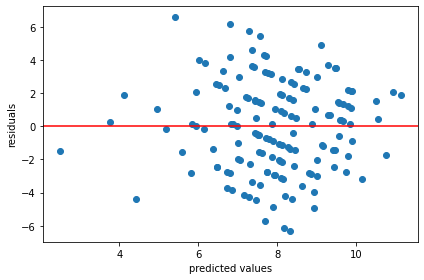

In [26]:
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.tight_layout()

In the above ordinary least squares (OLS) regression model we see that there is generally no pattern in the residuals, which is a good thing.  It also tells us that there is not an obvious change we can make to the features such as taking the log of them or anything that would improve the model.  Looking at the residuals, it looks like the majority of teams are predicted to win between 6-10 games, which makes sense as most teams do tend to be in that range.  The R-squared of the linear regression model turned out to be ~0.211 - not the best.  This says that roughly 21.1% of the variation in wins is explained by the variation in the money spent on QB, RB, WR, TE, OL, DL, LB, S, CB, SpecialTeams, and the calculated PercentUsed. 

I decided to go with these columns because the others such as Offense, Defense, Total, DeadMoney, and CapMax are contained in the features I used.  For example, Offense is simply the sum of QB, RB, WR, TE, OL - so adding it will only duplicate information in the model, the same for defense and total - they do not add any futher information.  DeadMoney and CapMax are both captured in the PercertUsed column - PercentUsed is the same as Total / CapMax, and The difference between total and CapMax is DeadMoney.  

The results of this model lead me to believe that mabe these features aren't the best at predicting the number of wins for a given NFL team.  So, I try some feature selection techniques to see if we can get a better model by using different predictors:

In [27]:
# Below code taken from lecture notes... and modified a bit to test with this project
def model_experiment(num_iter = 5, 
                     models = ['ols', 'ridge', 'lasso'], alpha= 10, 
                     complexity = 'simple', degree = 3):
    
    #make sure X and y start out set correctly
    X_train, X_test = train_test_split(df, test_size = 0.2) # splits the data into two parts with 1:4 ratio
    X = X_train[['QB','RB', 'WR', 'TE', 'OL', 'DL', 'LB', 'S', 'CB', 'SpecialTeams', 'PercentUsed']]
    y = X_train.Wins
    
    x_axis = np.arange(num_iter)
    y_ols_test = []
    y_lasso_test = []
    y_ridge_test = []
    sample_models = {}
    for i in range(num_iter):
        
        if complexity == 'simple':
            ## split train_test 
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        elif complexity == 'polynomial':
            ## Create higher order terms
            poly = PolynomialFeatures(degree=degree)
            Xp = poly.fit_transform(X)
            ## test-train split
            X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size = 0.2)


        ## Standard scale mean = 0, variance = 1
        sd = StandardScaler()

        sd.fit(X_train)

        X_train = sd.transform(X_train)

        X_test = sd.transform(X_test)

        ## Be careful about the leakage

        ## Vanilla model
        if 'ols' in models:
            lr = LinearRegression()

            lr.fit(X_train, y_train)
            
            sample_models['ols'] = lr

            test_score = lr.score(X_test, y_test)
            train_score = lr.score(X_train, y_train)

            y_ols_test.append(test_score)

    #       print('test score OLS is %.2f and train score is %.2f'%(test_score, train_score))

        if 'ridge' in models:
            ## Ridge in the simple setting
            ridge = Ridge(alpha = alpha, max_iter= 10000)
            ridge.fit(X_train, y_train)
            sample_models['ridge'] = ridge
            y_ridge_test.append(ridge.score(X_test, y_test))
    #         print('test score Ridge is %.2f and train score is %.2f'%(ridge.score(X_test, y_test),
    #                                                             ridge.score(X_train, y_train)))

        if 'lasso' in models:
            ## Lasso in the simple setting
            lasso = Lasso(alpha = alpha, max_iter= 10000)

            lasso.fit(X_train, y_train)
            
            sample_models['lasso'] = lasso
            
            y_lasso_test.append(lasso.score(X_test, y_test))
    #       print('test score Lasso is %.2f and train score is %.2f'%(lasso.score(X_test, y_test),
    #                                                             lasso.score(X_train, y_train)))

        i+=1
    if 'ols' in models:
        plt.plot(y_ols_test, label = 'ols')
    if 'ridge' in models:
        plt.plot(y_ridge_test, label = 'ridge')
    if 'lasso' in models:
        plt.plot(y_lasso_test, label = 'lasso')
    plt.ylabel('R2 test score')
    plt.xlabel('number of iterations')
    all_results = y_ols_test + y_lasso_test + y_ridge_test
    plt.ylim((np.min(all_results), np.max(all_results)))
    
    plt.legend()
    return sample_models


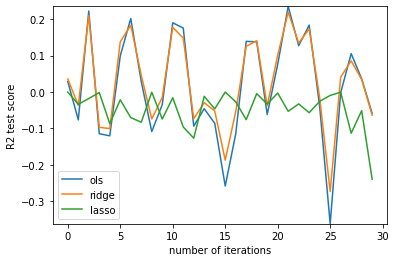

In [47]:
trained_models = model_experiment(num_iter=30, alpha = 15,
                                   models = ['ols', 'ridge', 'lasso'], 
                                   complexity= 'simple', degree = 3)

I use the above code to run 30 iterations (randomness in iterations comes from the randomness of the train/test split) for ols, ridge, and lasso regression models.  OLS seeks to minimize the sum of the squared residuals:
 
 $$ J(\beta) = \sum\limits_{i=0}^{n} (y_{i} - \beta_{0} - \beta_{1}X_{i1} - \beta_{2}X_{i2} - \cdots - \beta_{p}X_{ip})^{2} $$
 
where i is the ith observation, n is the total number of observations, y sub i is the actual win total for the ith observation, B sub 0 is the intercept, B sub 1...p are the coefficients for each feature, and X sub 1..p is the feature value of the pth feature for the ith observation.

Meanwhile, ridge seeks to minimize:
$$ J_{\lambda}(\beta) = J(\beta) + \lambda\sum_{i=1}^{p} \beta_{i}^{2} $$

And lasso seeks to minimize:
$$ J_{\lambda}(\beta) = J(\beta) + \lambda\sum_{i=1}^{p}| \beta_{i} | $$


Ridge and lasso regression are good to try when the model contains high variation, with colinearity and too many variables.  This seems to be a good place to try it since in this model there is certainly both colinearity and many varibles.  The colinearity comes from the fact that these features are not entirely independent of each other.  For example, due to the salary cap, if a team spends more money on a quarterback it follows that they will have to spend less elsewhere to stay within the cap which leads to a relationship between each of the individual features.  There too are many variables - not just one or two, we try to use 11 in this model.  Of the 11, of the original OLS we tried, only 1 was statistacally different from 0.

Ridge helps to reduce overfitting by penalizing complexity/large coefficients (by adding more to the sum the larger the coefficient is) .  This reduces the complecity of the model, reduces the variance, and helps with the colinearity but is not as useful when we have a lot of features.  Lasso performs similarly except that it has a feature selection property that ridge does not have.  I also experimented with different lambda levels and this lambda of 15 seemed like it tended to yeild the highest r-squared values.

In our case, we can see from the graph above that ridge regression performed very similarly to the ols model.  And that lasso performed worse, generally with an R-squared value at or below 0.  An R-squared value less than 0 can be interpreted to mean that the model is worse than just guessing every prediction to be the mean value of wins.  This is not suprising for lasso since in our model, only 1 feature was statistically significant, and with the features being reduced in lasso, it ignores all of them since they do not clearly show a relationship to wins - with that approach our model is no better at predicting wins than simply guessing the mean number of wins for every observation.


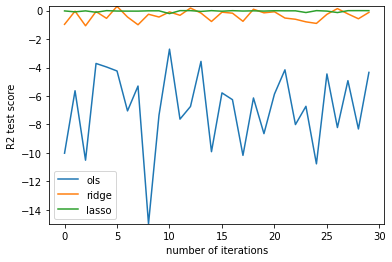

In [52]:
trained_models = model_experiment(num_iter=30, alpha = 15,
                                   models = ['ols', 'ridge', 'lasso'], 
                                   complexity= 'polynomial', degree = 3)

We can try to run the models again this time using polynomials to create a new feature matrix that has all of the polynomial combinations of the features up to and including the degree specified.  As we can see from the graph above, polynomial is clearly worse than the simple linear regression as the r-squared values are generally negative showing the model is no better than a guess of the mean.  It follows that there is not a polynomial relationship between these features and wins for the model to use.

In [53]:
# After run model_experiment we can look at the coeficient results
lr_ols = trained_models['ols']
lr_lasso = trained_models['lasso']
lr_ridge =trained_models['ridge']

# check the coefficients from Lasso and Ridge
print(lr_ridge.coef_)
print(lr_lasso.coef_)

[ 0.          0.45722852 -0.36507312 -0.07837189 -0.08183965 -0.02979825
  0.1888561  -0.04088199 -0.13262083  0.38481629  0.00190555  0.18598981
  0.16281263 -0.17029569  0.08207941  0.06460672  0.15989439  0.27345118
  0.22640641  0.04631404  0.28981308  0.07535624  0.39304063 -0.17730893
 -0.15548594 -0.15534406 -0.05817798 -0.0723056   0.16197384 -0.07568805
 -0.03671158 -0.06672236 -0.25124839  0.04203738 -0.05553454  0.01792972
 -0.05148419 -0.06253071 -0.01172686  0.10212567 -0.14650151 -0.03230348
 -0.08065269  0.06846823 -0.02850493 -0.08820311  0.03356979  0.08575934
  0.08455699 -0.10465389  0.03354455  0.08118236 -0.07678354 -0.18709986
 -0.1153561   0.06642046 -0.00691578  0.11703963  0.01106513  0.04545523
  0.11759841  0.08375273  0.11414827 -0.06325566  0.07672791  0.04075137
 -0.12353456 -0.00673349  0.00504061 -0.21716656 -0.0963828  -0.08551684
  0.38086237 -0.02430296  0.29093416  0.11898408  0.12606274  0.2025921
 -0.2801176  -0.26582059 -0.09724504 -0.17203935 -0.

The results of these coeficients agree with what we saw in the graphs.  The ridge regression results are non-zero and contain an attempt to predict wins, which perform similar to OLS in the simple model.  For the second array (the lasso results) we see nothing but zeros.  The lasso regression finds nothing statistically significant and ignores all our features resulting in r-squared values scattered around 0.

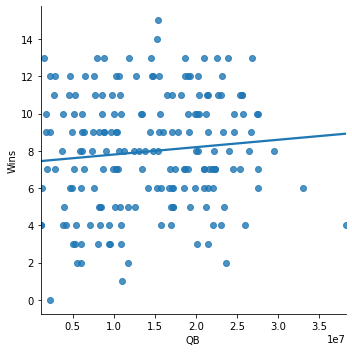

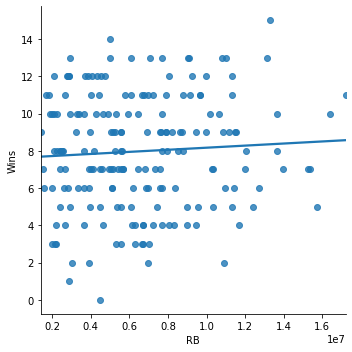

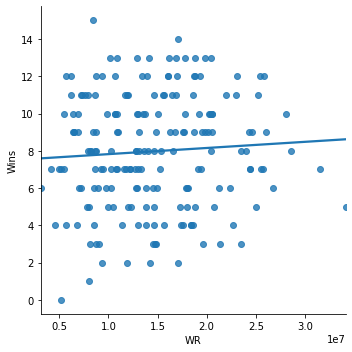

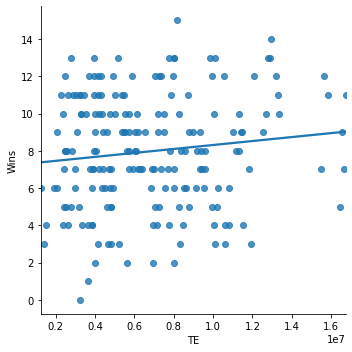

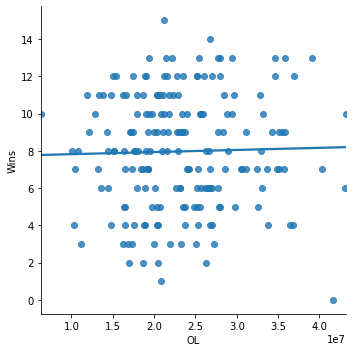

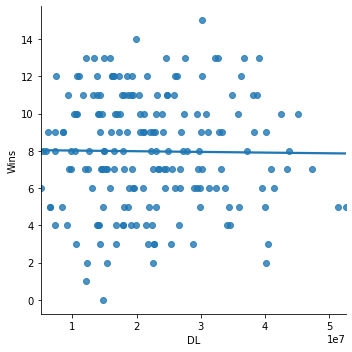

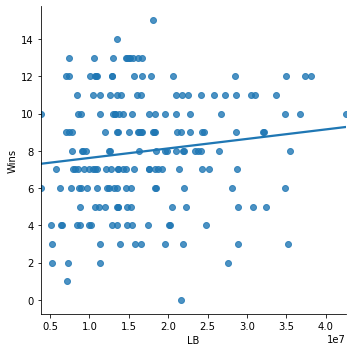

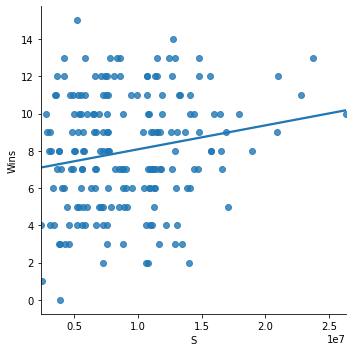

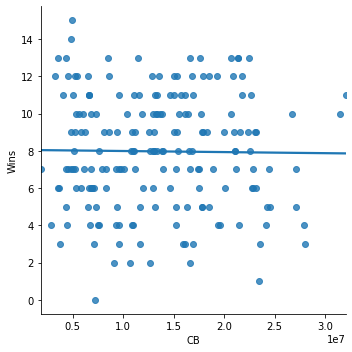

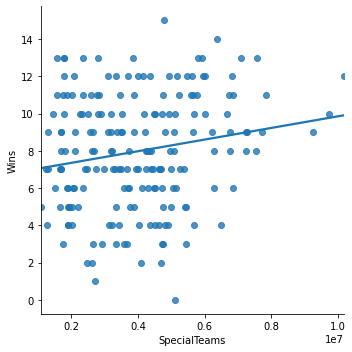

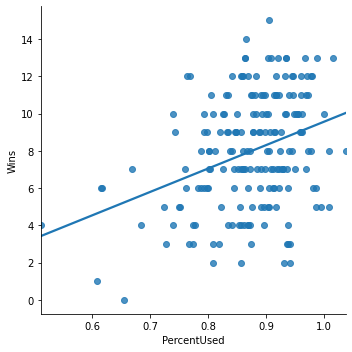

In [91]:
## let's use seaborn to plot a regression line
for position in ['QB','RB', 'WR', 'TE', 'OL', 'DL', 'LB', 'S', 'CB', 'SpecialTeams', 'PercentUsed']:
    sns.lmplot(x = position, y = 'Wins', data = df, ci = 0)
    plt.draw()

Another experiment I did is shown above: I can graph the relationship between a specific predictor such as QB and wins.  This can be done for each individual predictor.  The takeaway is similar to what the regression model shows - potentially a slight relationship, but not much of one.  The slope of the line of best fit above is close to 0 (it is relatively flat) showing that the amount spent on QB does not have that much of an impact on the number of wins.

If we take a look at all of the plots, we clearly see that the one with the steepest slope and therefore most obvious impact on Wins is the PercentUsed feature, which aggrees with our linear regression results.

With linear regression not explaining a ton of the variance in wins, we turn to make this into a classification problem with a hope of learning more or seeing if we can get an accuracy better than random guessing:

In [64]:
#Function to Draw tree taken from python utils file

def draw_tree(estimator, figsize =(15, 5), feature_names = ["Hits", "Years"]):
    """
    Takes a decision  tree estimator and plots it's tree structure
    :param estimator: A sklearn decision tree estimator. Should be fitted.
    :param figsize: tuple. (int, int).
    :param feature_names:
    :return: It returns a plot. The image is not saved.
    """
    fig = plt.figure(figsize= figsize)
    _ = tree.plot_tree(estimator,
                       feature_names= feature_names,
                       filled=True)

[[1 5 4]
 [1 6 5]
 [4 7 6]]
              precision    recall  f1-score   support

         Bad       0.17      0.10      0.12        10
        Good       0.33      0.50      0.40        12
    Mediocre       0.40      0.35      0.38        17

    accuracy                           0.33        39
   macro avg       0.30      0.32      0.30        39
weighted avg       0.32      0.33      0.32        39



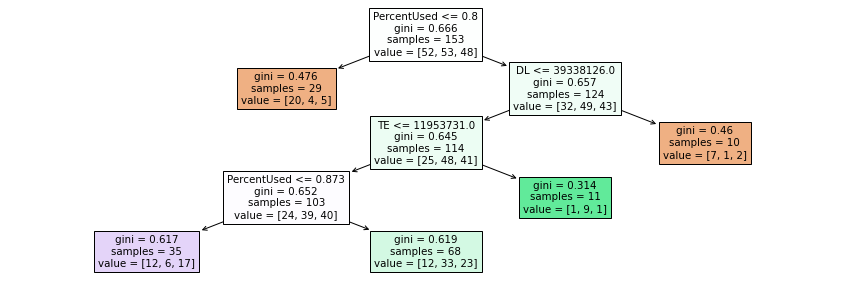

In [71]:
## here let's apply sklearn DecisionTreeClassifier

#drop the columns that are not predictors
X = df.drop(['Team', 'Year', 'Wins', 'Losses', 'Ties', 'Classification', 'Offense', 'Defense', 'Total', 'DeadMoney', 'CapMax'], axis=1)
y = df['Classification'] #set the goal to be the classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) #split the data

classifier = DecisionTreeClassifier(max_leaf_nodes= 5) #create the classifier and fit it
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)  #predict using the test data for metrics

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

draw_tree(classifier,feature_names= X_train.columns)

The results of the decision tree do not look promising either.  The accuracy is 0.33 which is 1/3 and of one of our 3 categories is no better than a 1/3rd chance of randomly guessing a classification.  In this experiment I made the max leaf nodes stop at 5 so that the top of the tree could more clearly be seen and interpreted.  In attempt to try to make the decisino tree better I attempt another experiment using corss validation next.  The top left of the output also contains a confusion matrix.  The vertical axis of this table is the actual classification and the horizontal is the predicted.  So, the numbers along the diagnal are the correctly classified ones.  The accuracy is therefore the sum of the numbers along the diagnal divided by the total sum.  Recall refers to a horizontal row within the confusion matrix - for actual class 0, there were 1+5+4 of the actual class and only 1 was classified correctly so recall is 1/10 or 0.1.  Precision refers to a vertical column in the confusion matrix - for predicted class 0, there were 1+1+4 predicted as class 0, and only 1 was classified correctly, so precision is 1/6 or 0.17.

In [78]:
depth = []
for i in range(3,100):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=10, n_jobs=4)
    depth.append((i,scores.mean()))
for elements in depth:
    print("Depth: " + str(elements[0]) + " with accuracy of: " + str(elements[1]))

Depth: 3 with accuracy of: 0.3539473684210526
Depth: 4 with accuracy of: 0.3542105263157895
Depth: 5 with accuracy of: 0.33315789473684204
Depth: 6 with accuracy of: 0.3342105263157894
Depth: 7 with accuracy of: 0.36
Depth: 8 with accuracy of: 0.36999999999999994
Depth: 9 with accuracy of: 0.35
Depth: 10 with accuracy of: 0.38052631578947366
Depth: 11 with accuracy of: 0.3705263157894737
Depth: 12 with accuracy of: 0.3810526315789473
Depth: 13 with accuracy of: 0.36026315789473684
Depth: 14 with accuracy of: 0.391578947368421
Depth: 15 with accuracy of: 0.39078947368421046
Depth: 16 with accuracy of: 0.41236842105263155
Depth: 17 with accuracy of: 0.375
Depth: 18 with accuracy of: 0.35473684210526313
Depth: 19 with accuracy of: 0.35973684210526313
Depth: 20 with accuracy of: 0.3389473684210526
Depth: 21 with accuracy of: 0.36526315789473685
Depth: 22 with accuracy of: 0.3594736842105263
Depth: 23 with accuracy of: 0.37078947368421045
Depth: 24 with accuracy of: 0.37526315789473685
Dept

There are many reasons I decided to use cross-validation.  First, compared to a leave-one-out approach, it is more computationally friendly.  Second, there are many benefits of using it.  The goal of machine learning is to minimize the error in the tests, which are predicting/classifying for never seen before data.  When using cross validation, all data is used as both training and testing data as in our 10-fold cross validation, 10 different models are created for each depth, using 10% of the data for testing in each model and 90% for training.  Each increment of the 10% test data is stepped through, with the remaining 90% being the training data.  So, every data observation is used for testing at least once and every observation is used for training k-1 times.  When we have a bunch of weaker models, the thought is to potentially combine them into one stronger model.  Since we have seen so far with modeling this data that it is relatively weak, cross validation sounds like an excellent idea.

Another benefit is its balance for the variance-bias trade-off.  It has lower bias than just a single validation set approach since a single validation set approach is more dependent on how good the random split of the test and training sets was.  It also has lower variance than leave-one-out-cross-validation (LOOCV) as the model is more generalized rather than overfitting by training with all but one observation in the data.

Looking at the results of the cross-validated decision trees it looks like the accuracy tends to be around 36-38% which is better than the random guessing of 33% but still does not tell us a whole lot about predicting whether a team is good, bad, or mediocre.  It goes along the same results as the linear regression showed - the model tells us a little bit, but not a whole lot.

In turn, we look to see what we can get out of these decision tree results.  Decision trees are built based on splitting each division by what will give the highest information gain.  We determine the information gain by calculating the entropy.  Entropy is given by:

$\large E = -\Sigma_i p_i\log_2(p_i)$,

Entropy is always between 0 and 1, the closer it is to 0 the better.  The higher the entropy, the more disordered the group is.  Information gain is the entropy of the parent group minus the entropy of the split so performance is maximized by minimizing the splits entropy.  It follows that when decision trees are created, they examine the entropy of all possible splits, and choose the split with the minimum entropy.

Knowing this, we can get something out of our decision tree results.  In the graphic I created we see the root split is split based off of the PercentUsed feature.  Then at the third level, PercentUsed is again used on another split.  It follows that clearly the PercentUsed feature has the largest impact on wins - this interpretation agrees with what we saw in the linear regression.

Out of curiosity, I also experimented with KNN to see if it would give any better results than the decision tree:


In [88]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)


#Can use this code to test a single model
## here let's apply sklearn DecisionTreeClassifier
X = df.drop(['Team', 'Year', 'Wins', 'Losses', 'Ties', 'Classification', 'Offense', 'Defense', 'Total', 'DeadMoney', 'CapMax'], axis=1)
y = df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#can test again with cross-validation here:
depth = []
for i in range(3,11,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator=knn, X=X, y=y, cv=10, n_jobs=4)
    depth.append((i,scores.mean()))
for elements in depth:
    print("Depth: " + str(elements[0]) + " with accuracy of: " + str(elements[1]))


Accuracy: 0.38461538461538464
Depth: 3 with accuracy of: 0.33394736842105266
Depth: 5 with accuracy of: 0.3226315789473684
Depth: 7 with accuracy of: 0.35447368421052633
Depth: 9 with accuracy of: 0.2968421052631579


The KNN model vectorizes/plots the features and their classifications, and whatever points the new test observation is closest to, the closest k points vote for a classification for the new observation.  This is a form of unsupervised learning and the hope was that it might capture the combination of the features better.  It turns out that the results are no better than random guessing once again and the decision tree proved more informative.  This model is thrown out.

# Results and Discussion

Lets begin analysing the results with the linear regression model.  Looking at the coefficients, we see that only 1 of the features is statistically significant.  We can tell this in a few different ways.  First by looking at the 95% confidence intervals on the right, we see that all of the intervals for the features (except the const, since this is the intercept we ignore its significance) all span 0.  Due to this fact, we cannot say that we are confident at all that the relationship between money spent on QB, RB, WR, TE, OL, DL, LB, S, CB, SpecialTeams are non-zero - there may be no relationship at all.  Another way we can tell is with the p-values.  Looking at the p-value column (P> |t|) we see that all of these values are greater than 0.05, except for PercentUsed.  This means that the probability that each of those features is not different from 0 is greater than 5% for all but PercentUsed showing again that PercentUsed is the only statistically signinficant feature.  

The R-squared value of 0.211 is interpreted to mean that roughly 21.1% of the variance in wins can be explained by these predictor variables.  This is not great, so I try to use the techniques of ridge and lasso regression as described in the experiments section to improve the model.  Neither ended up really improving the OLS model, so the result is to stay with the OLS model.  Ridge performed similarly to OLS, and lasso ignored too many of our features to be of any use at all, saying that none of them had any significance.  The r-squared tend to bounce between 0 and 0.2 for 30 iterations of random testing for both OLS and Ridge while the r-squared for lasso remained around or slightly below 0.  Making the model polynomial only hurt the r-squared values and validness of the model, which makes sense given that there were no patterns in the original residuals plot.

Moving onto the classification problem of classifying a team as good, bad, or mediocre I started with a decision tree model.  In this model, the model itself bounced around 33% accuracy, which is the same as taking a random guess at the classification of 1 of the 3 categories.  So, I ran cross-validation on the decision trees and took the mean score of the trees - finding that the accuracy of these tended to be in the 36-38% range, slightly better showing that the model might be a little better than random guessing.  The other result to note here is that the decision tree tended to split early and often on PercentUsed showing that this is the most impactful feature when predicting wins for an NFL team.  Lastly, I experimented with KNN to see if its results were any better and found that they were not an improvement over the decision trees.



# Conclusion and Summary

The conclusion of the findings in this project is that there is not really a correct way to allocate money within the salary cap per position that leads to the team being successful, but what is most impactful is that team owners spend the money that they are allowed to spend.  There are a lot of ways for a team to be successful.  For example a team might have a really good offense by spending a lot on QB, RB, WR, TE, and OL and less on defense and be succesful because the offense is so good they don't need a good defense.  On the flip side if a team spends more on having a really good defense and no one can score on them, no matter how good their offense is they are going to be successful, other teams find success in a more balanced approach.  Bottom line is that there is no one right written way to allocate money by position to be successful.  There are also many other factors involved in the number of wins a team gets.  For example, the coaching staff matters, there is a little luck involved if a team loses a close game or two due to a bad call, their wins for the year are 2 off from projections (2 wins is a big difference).

The most important information that we can takeaway from the results is that it is important for teams to spend all of the money they are allowed to within the cap and reduce dead money to zero if possible.  If a team only spends 60% of the alloted cap space, they don't have as good of a chance to win as a team who spent 100% of their cap space.  This makes sense as the better players the team buys in general, the higher chance they have at being successful.


# Limitations and Later Work

There were some limitations I ran into while doing this project.  When collecting the data, I could only get back to 2013 and did some manual work to get the data into excel for simplicty whereas using an automated way to scrape the data to a csv may have been better for being able to run a future script to get more data once it becomes available as years go on and it is updated.  I spent more time on the machine learning portion of this project than automating the data collection.  With the limited amount of data, it may be more difficult for the machine learning algorithms to find the patterns they need to within the data to be accurate.

Another limitation is in the regression techniques we have learned so far.  It turns out that the linear regression model does not do great at predicting wins.  The colinearity between the features is a problem as in linear regression they are all assumed to be completely independent.  I believe that a different, perhaps deep learning,  model like neural networks could potentially do a better job to get a higher accuracy with both the regression and classification problems.


# References and Contributions

Data contributions:
- https://overthecap.com/positional-spending/
- https://www.spotrac.com/nfl/positional/breakdown/

Machine learning references and contributions:
- Professor Guner's lecture notes
- Sklearn documentation: https://scikit-learn.org/stable/index.html
- ISLR Textbook: https://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf
- Ridge Regression Chapter: https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Ridge_Regression.pdf
